In [147]:
print ("Developed by -")
name = u'\u0053\u0075\u0062\u0068\u0061\u006D\u0020\u0047\u0068\u006F\u0073\u0068'
print(name)

Developed by -
Subham Ghosh


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mser, mean_absolute_error as maer, r2_score as r2s

In [101]:
data = pd.read_csv("C:/Users/isubh/OneDrive/Desktop/rainfall.csv")
print (data)

                   subdivision  YEAR    JUN    JUL    AUG    SEP  JUN-SEP
0     ANDAMAN & NICOBAR ISLAND  1901  517.5  365.1  481.1  332.6   1696.3
1     ANDAMAN & NICOBAR ISLAND  1902  537.1  228.9  753.7  666.2   2185.9
2     ANDAMAN & NICOBAR ISLAND  1903  479.9  728.4  326.7  339.0   1874.0
3     ANDAMAN & NICOBAR ISLAND  1904  495.1  502.0  160.1  820.4   1977.6
4     ANDAMAN & NICOBAR ISLAND  1905  628.7  368.7  330.5  297.0   1624.9
...                        ...   ...    ...    ...    ...    ...      ...
4327                LAKSHDWEEP  2017  521.9  164.2  206.2  216.0   1108.3
4328                LAKSHDWEEP  2018  203.2  139.7  124.4   74.4    541.7
4329                LAKSHDWEEP  2019  242.5  489.4  338.4  156.7   1227.0
4330                LAKSHDWEEP  2020  265.4  476.2  269.6  334.3   1345.5
4331                LAKSHDWEEP  2021  160.0  156.5  319.5  154.9    790.9

[4332 rows x 7 columns]


In [103]:
data.shape

(4332, 7)

In [105]:
data.isnull().sum()

subdivision    0
YEAR           0
JUN            0
JUL            0
AUG            0
SEP            0
JUN-SEP        0
dtype: int64

In [107]:
data.describe()

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
count,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000
mean,1961.224377,227.582410,344.361657,288.907018,197.399931,1057.105217
std,34.869503,232.087633,268.229923,189.930239,136.681781,706.555790
min,1901.000000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,1931.000000,70.400000,173.875000,155.000000,99.875000,565.925000
50%,1961.000000,137.650000,283.250000,258.000000,172.900000,877.300000
75%,1991.000000,303.725000,416.175000,377.625000,266.500000,1287.900000
max,2021.000000,1609.900000,2362.800000,1664.600000,1222.000000,4536.900000


In [109]:
# Drop the 'subdivision' column
data = data.drop(columns=['subdivision'])

# Verify the column has been removed
print(data.head())

   YEAR    JUN    JUL    AUG    SEP  JUN-SEP
0  1901  517.5  365.1  481.1  332.6   1696.3
1  1902  537.1  228.9  753.7  666.2   2185.9
2  1903  479.9  728.4  326.7  339.0   1874.0
3  1904  495.1  502.0  160.1  820.4   1977.6
4  1905  628.7  368.7  330.5  297.0   1624.9


In [111]:
# Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)

             YEAR       JUN       JUL       AUG       SEP   JUN-SEP
YEAR     1.000000 -0.014711 -0.017796  0.006009  0.011277 -0.006549
JUN     -0.014711  1.000000  0.738897  0.653283  0.547204  0.885837
JUL     -0.017796  0.738897  1.000000  0.687658  0.516727  0.907818
AUG      0.006009  0.653283  0.687658  1.000000  0.499078  0.839373
SEP      0.011277  0.547204  0.516727  0.499078  1.000000  0.703555
JUN-SEP -0.006549  0.885837  0.907818  0.839373  0.703555  1.000000


In [173]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get the correlation of 'YEAR' with other columns and sort
correlation_with_year = correlation_matrix["YEAR"].sort_values(ascending=False)
print(correlation_with_year)

YEAR       1.000000
SEP        0.011277
AUG        0.006009
JUN-SEP   -0.006549
JUN       -0.014711
JUL       -0.017796
Name: YEAR, dtype: float64


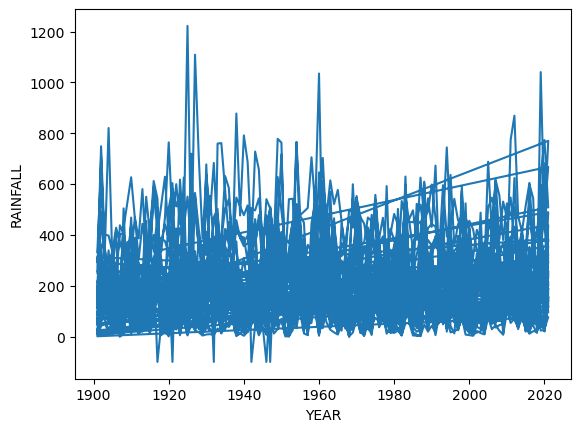

In [177]:
# Highly Correlated (September)

plt.plot(data['YEAR'], data['SEP'])
plt.xlabel("YEAR")
plt.ylabel("RAINFALL")
plt.show()

In [179]:
x = data[["YEAR"]]
y = data[["SEP"]]

In [181]:
x_train,x_test,y_train,y_test = tts(x, y, test_size=0.25, random_state=1)

In [183]:
print("Highly correlated")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Highly correlated
(3249, 1)
(1083, 1)
(3249, 1)
(1083, 1)


In [185]:
model_h = lr()
model_h.fit(x_train,y_train)

LinearRegression()

In [187]:
train_predicted = model_h.predict(x_train)
test_predicted = model_h.predict(x_test)

In [189]:
train_sse = np.sum((train_predicted - y_train)**2, axis = 0)
train_sse

SEP    6.106454e+07
dtype: float64

In [191]:
test_sse = np.sum((test_predicted - y_test)**2, axis = 0)
test_sse

SEP    1.986491e+07
dtype: float64

In [193]:
mae = maer(y_train, train_predicted)
mae

104.2452434631317

Text(0, 0.5, 'Temperature')

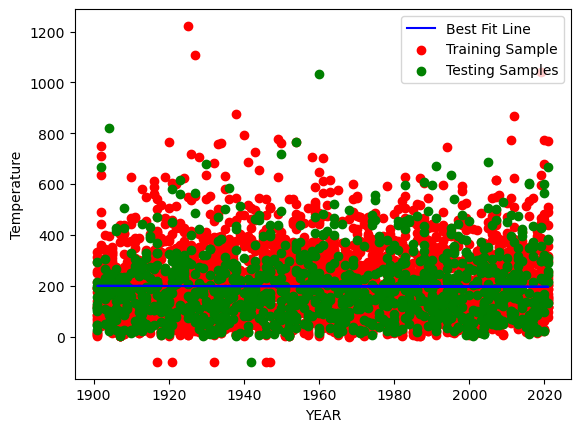

In [195]:
plt.plot(x_train, train_predicted, c = 'b')
plt.scatter(x_train, y_train, c = 'r')
plt.scatter(x_test, y_test, c = 'g')
plt.legend(["Best Fit Line", "Training Sample", "Testing Samples"])
plt.xlabel("YEAR")
plt.ylabel("Temperature")

In [197]:
train_sse = []
test_sse = []

tr_size = 0.1

while tr_size <= 0.9:
    x_train, x_test, y_train, y_test = tts(x, y, train_size = tr_size, random_state=1)
    
    mod = lr()
    mod.fit(x_train, y_train)
    
    pred_train = mod.predict(x_train)
    pred_test = mod.predict(x_test)
    
    tr_sse = np.sum((pred_train - y_train)**2, axis = 0)
    te_sse = np.sum((pred_test - y_test)**2, axis = 0)
    
    train_sse.append(tr_sse)
    test_sse.append(te_sse)
    
    tr_size += 0.1

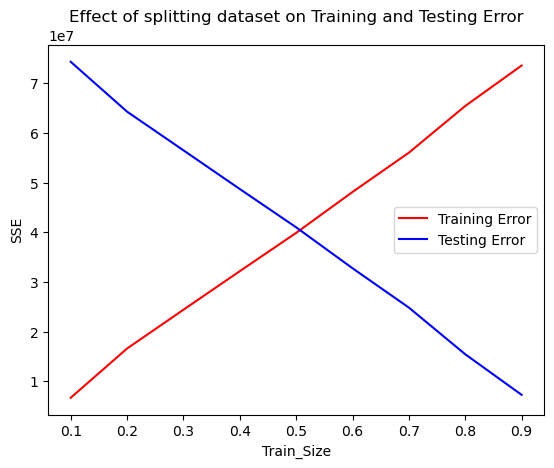

In [199]:
trainSize = []
for i in range(1, 10):
    trainSize.append(i/10)

plt.title("Effect of splitting dataset on Training and Testing Error")
plt.plot(trainSize, np.array(train_sse), c = 'r')
plt.plot(trainSize, np.array(test_sse), c = 'b')

plt.xlabel("Train_Size")
plt.ylabel("SSE")

plt.legend(["Training Error", "Testing Error"])